In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from skimage.color import *
import cv2
from my_commonfunctions import *

matplotlib.rcParams['figure.dpi'] = 200

In [13]:
test3_gray = (rgb2gray(io.imread('test3.png')) * 255).astype(np.uint8)
test3_w1000_gray = (rgb2gray(io.imread('test3_w1000.png')) * 255).astype(np.uint8)
test3_w1300_gray = (rgb2gray(io.imread('test3_w1300.png')) * 255).astype(np.uint8)
test4_gray = (rgb2gray(io.imread('test4.png')) * 255).astype(np.uint8)
test5_gray = (rgb2gray(io.imread('test5.png')) * 255).astype(np.uint8)
Beethoven_croped_gray = (rgb2gray(io.imread('Beethoven_Op026-01_001_croped.png'))).astype(np.uint8)
Beethoven_gray = (rgb2gray(io.imread('Beethoven_Op026-01_001.png'))).astype(np.uint8)

/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """Entry point for launching an IPython kernel.
/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  
/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/

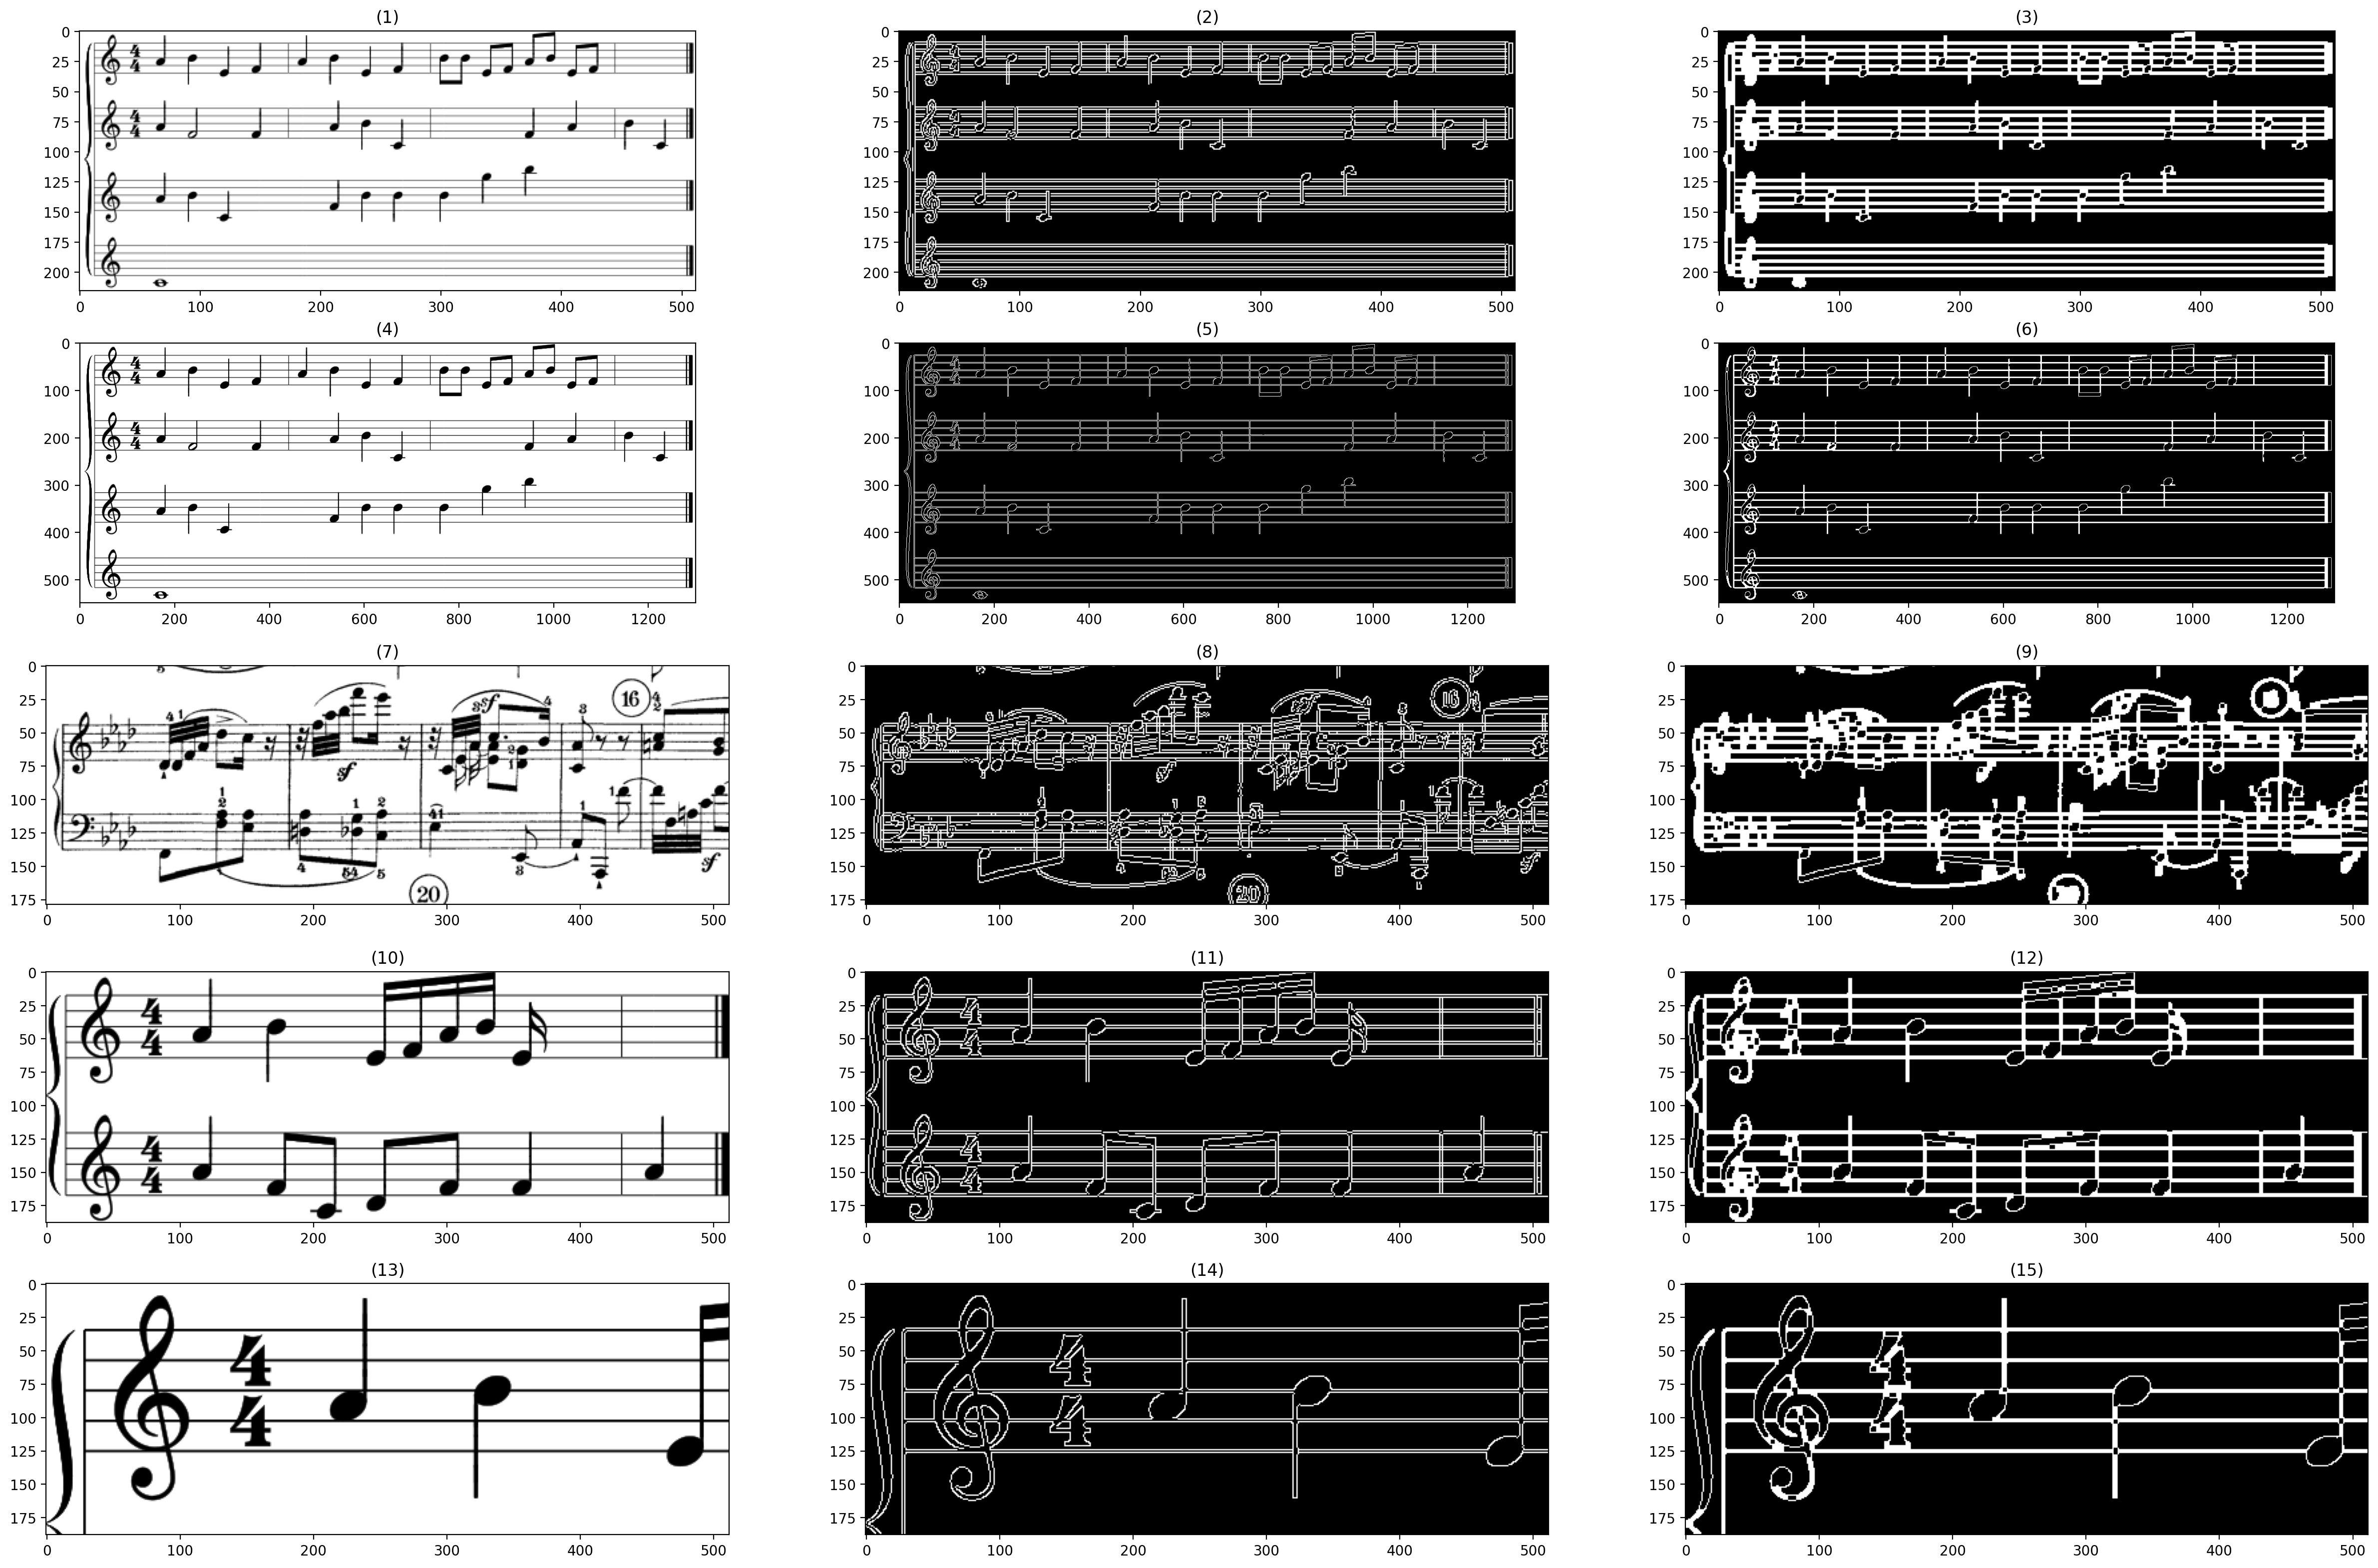

In [15]:
kc1 = np.ones((3, 3))

edges_test3 = cv2.Canny(test3_gray, 100, 200)
closed_test3 = my_close(edges_test3, kc1)

edges_test3_w1300 = cv2.Canny(test3_w1300_gray, 100, 200)
closed_test3_w1300 = my_close(edges_test3_w1300, kc1)

edges_test4 = cv2.Canny(test4_gray, 100, 200)
closed_test4 = my_close(edges_test4, kc1)

edges_test5 = cv2.Canny(test5_gray, 100, 200)
closed_test5 = my_close(edges_test5, kc1)

edges_Beethoven_croped = cv2.Canny(Beethoven_croped_gray, 100, 200)
closed_Beethoven_croped = my_close(edges_Beethoven_croped, kc1)

my_show_images([test3_gray, edges_test3, closed_test3,
                test3_w1300_gray, edges_test3_w1300, closed_test3_w1300,
                Beethoven_croped_gray, edges_Beethoven_croped, closed_Beethoven_croped,
                test4_gray, edges_test4, closed_test4, 
                test5_gray, edges_test5, closed_test5], 
               row_max=3)


In [4]:
def metric(img_gray_uint8, thresh, greater_or_less):
    binary = img_gray_uint8 > thresh if greater_or_less == 'greater' else img_gray_uint8 < thresh
    canny = cv2.Canny(img_gray_uint8, 100, 200) > 200
    binary_sum = np.sum(binary)
    canny_sum = np.sum(canny)
    return binary_sum/canny_sum

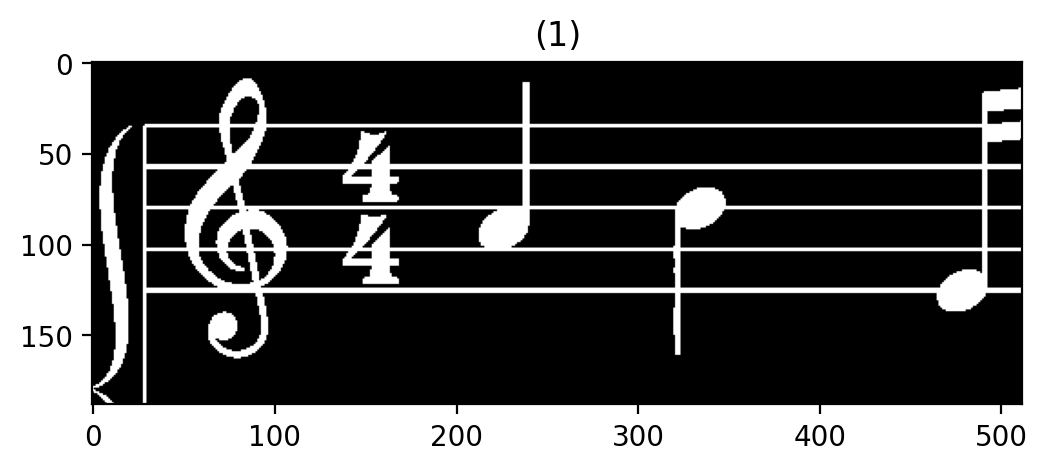

In [14]:
my_show_images([test5_gray < 175], row_max=1)

In [11]:
metric(Beethoven_croped_gray, 175, 'less')

1.0121636100081932

In [13]:
metric(test4_gray, 175, 'less')

1.164564845087965

In [15]:
metric(test5_gray, 175, 'less')

1.8885697874784606

In [16]:
metric(test3_gray, 175, 'less')

0.5757862912323451

In [17]:
metric(test3_w1000_gray, 175, 'less')

0.7931223665730337

In [21]:
metric(test3_w1300_gray, 175, 'less')

1.070618625872249

In [9]:
def get_initial_contours_y(img_gray_uint8, kernel_size):
    # 1. Canny
    edges = cv2.Canny(img_gray_uint8, 100, 200)
    
    # 2. Closing
    k = np.ones(kernel_size)
    closed = my_close(edges, k)
    
    # 3. White pixels freq in each row
    closed_bin = closed > 200
    sum_of_rows = np.sum(closed_bin, axis=1) # Sum of each row
    img_width = img_gray_uint8.shape[1]
    is_line = (sum_of_rows / img_width) > 0.8 # Normalization & thresholding (If percentage of white pixels of each row is 80% or higher, this row is considered a line)
    
    # 4. Contours of is_line
    image, init_contours, hierarchy = cv2.findContours((is_line*255).astype(np.uint8), 
                                              cv2.RETR_TREE, 
                                              cv2.CHAIN_APPROX_SIMPLE)
    init_contours = np.array(init_contours).squeeze()
    init_contours_y = init_contours.T[1].T
    
    return init_contours_y


In [11]:
get_initial_contours_y(test5_gray, (33, 33)).shape

(2,)